<a href="https://colab.research.google.com/github/nkumar008/Hate_speech_detection_model/blob/main/Hate_speechdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrmorj/hate-speech-and-offensive-language-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'hate-speech-and-offensive-language-dataset' dataset.
Path to dataset files: /kaggle/input/hate-speech-and-offensive-language-dataset


In [52]:
import pandas as pd
import numpy as np
import os

# List the contents of the downloaded directory to find the correct file name
# print(os.listdir(path)) # This line is no longer needed after identifying the file

# After identifying the correct file name, replace 'hate speech datasets' with the actual file name
# For example, if the file is 'Hate Speech and Offensive Language.csv', you would use:
# df = pd.read_csv(os.path.join(path, 'Hate Speech and Offensive Language.csv'))

# Now loading the CSV file using the correct name 'labeled_data.csv'
df = pd.read_csv(os.path.join(path, 'labeled_data.csv'))

print("DataFrame loaded successfully. First 5 rows:")
print(df.head())

DataFrame loaded successfully. First 5 rows:
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [53]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


deleting unwanted column


In [54]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [55]:
df.drop(columns=['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'],inplace=True)

In [56]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [57]:
df.isnull().sum()

,0
class,0
tweet,0


In [58]:
df['tweet'].iloc[100]

'"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh'

In [59]:
df.shape

(24783, 2)

In [60]:
df.duplicated().sum()

np.int64(0)

# **deleting unwanted symbols and numeric data**

In [61]:
df['process_tweet']=df['tweet'].str.replace(r'[^a-zA-Z]',' ',regex=True)

In [62]:
df.head()

,class,tweet,process_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [63]:
df['process_tweet'].iloc[1000]

'                                                                 betysweetcocker  That pussy is just              imma assume she just had a baby like  the day before '

In [64]:
# handling unwanted spaces
df['process_tweet_2']=df['process_tweet'].str.replace(r'[\s]+',' ',regex=True)

In [65]:
df.head()

,class,tweet,process_tweet,process_tweet_2
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...,RT mayasolovely As a woman you shouldn t comp...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...,RT C G Anderson viva based she look like a tr...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...,RT ShenikaRoberts The shit you hear about me ...


In [66]:
df['process_tweet_2'].iloc[1000]

' betysweetcocker That pussy is just imma assume she just had a baby like the day before '

In [67]:
# deleting umwanted columns
df.drop(columns=['tweet','process_tweet'],inplace=True)

In [68]:
df.head()

,class,process_tweet_2
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


## **NLP TASK**

In [69]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [70]:
# Lemmatization
def lemmatization(text):
  doc=nlp(text)
  lemmaList=[word.lemma_ for word in doc]
  return ' '.join(lemmaList)

In [71]:
df['lemma_tweet']=df['process_tweet_2'].apply(lemmatization)

In [72]:
df.head()

,class,process_tweet_2,lemma_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...


In [73]:
df['process_tweet_2'].iloc[67]

' Allyhaaaaa Lemmie eat a Oreo amp do these dishes One oreo Lol'

In [74]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [75]:
# remove stopwords
def remove_stopwords(text):
  doc=nlp(text)
  no_stopwords_list=[word.text for word in doc if not word.is_stop]
  return ' '.join(no_stopwords_list)

In [76]:
df['final_tweet']=df['lemma_tweet'].apply(remove_stopwords)

In [77]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [78]:
df['final_tweet'].iloc[67]

'   Allyhaaaaa Lemmie eat Oreo amp dish oreo lol'

In [79]:
df.head()

,class,process_tweet_2,lemma_tweet,final_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...


In [80]:
from tensorflow.keras.preprocessing.text import one_hot

In [81]:
# one hot representation
vocab_size=1000
one_hot_representation=[one_hot(words,vocab_size) for words in df['final_tweet']]

In [82]:
df['final_tweet'].iloc[0]

'   RT mayasolovely woman shouldn t complain clean house amp man trash'

In [83]:
one_hot_representation[0]

[319, 23, 993, 682, 125, 56, 460, 77, 234, 492, 865]

In [84]:
# padding of sentences
from tensorflow.keras.utils import pad_sequences

In [85]:
sentence_length=20
embedded_tweet=pad_sequences(one_hot_representation,padding='pre',maxlen=sentence_length)


In [86]:
for i in range(0,4):
  print(embedded_tweet[i])

[  0   0   0   0   0   0   0   0   0 319  23 993 682 125  56 460  77 234
 492 865]
[  0   0   0   0   0   0   0 319 168 166 288 915 735 970 659 965 288 226
  21 385]
[  0   0   0   0   0   0   0   0 319 500 742 319 581 163 949  58 946 977
 696 757]
[  0   0   0   0   0   0   0   0   0   0   0 319 809 797 922  13  76 489
 456 896]


In [87]:
df

,class,process_tweet_2,lemma_tweet,final_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...
...,...,...,...,...
24778,1,you s a muthaf in lie LifeAsKing Pearls corey ...,you s a muthaf in lie lifeaske Pearls corey em...,s muthaf lie lifeaske Pearls corey emanuel rig...
24779,2,you ve gone and broke the wrong heart baby and...,you ve go and break the wrong heart baby and d...,ve break wrong heart baby drive redneck crazy
24780,1,young buck wanna eat dat nigguh like I aint fu...,young buck wanna eat dat nigguh like I be not ...,young buck wanna eat dat nigguh like fuckin dis
24781,1,youu got wild bitches tellin you lies,youu get wild bitch tellin you lie,youu wild bitch tellin lie


In [88]:
x=np.array(embedded_tweet)
y=np.array(df['class'])

In [89]:
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


Balance data using SMOTE

In [90]:
from imblearn.over_sampling import SMOTE

In [94]:
smote=SMOTE(sampling_strategy='minority')
x,y=smote.fit_resample(x,y)
print(x.shape)
print(y.shape)

(42543, 20)
(42543,)


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
x_train.shape,x_test.shape

((34034, 20), (8509, 20))

# **creating model**

In [99]:
import tensorflow as tf
from tensorflow import keras


In [102]:
dimension=50
model=keras.Sequential([
    # embedding layer
    keras.layers.Embedding(vocab_size,dimension,input_length=sentence_length),
    # Lstm layers
    keras.layers.LSTM(100,return_sequences=True),
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.LSTM(50),
    #output layer
    keras.layers.Dense(3,activation='softmax')

])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [105]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 20, 50)         │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 100)        │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 20, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 482,861 (1.84 MB)

 Trainable params: 160,953 (628.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 321,908 (1.23 MB)

In [108]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8912 - loss: 0.3226 - val_accuracy: 0.8795 - val_loss: 0.3447
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8987 - loss: 0.2891 - val_accuracy: 0.8828 - val_loss: 0.3325
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9058 - loss: 0.2697 - val_accuracy: 0.8822 - val_loss: 0.3259
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9140 - loss: 0.2470 - val_accuracy: 0.8795 - val_loss: 0.3381
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9192 - loss: 0.2330 - val_accuracy: 0.8762 - val_loss: 0.3459
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9238 - loss: 0.2193 - val_accuracy: 0.8717 - val_loss: 0.3725
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9284 - loss: 0.1996 - val_accuracy: 0.8721 - val_loss: 0.3800
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9356 -

In [110]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f'modelaccuracy:{accuracy*100}')

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8757 - loss: 0.4129
modelaccuracy:86.84921860694885


In [115]:
pred=np.argmax(model.predict(x_test),axis=-1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [116]:
y_test[:5]

array([1, 1, 0, 1, 2])

In [117]:
pred[:5]

array([1, 1, 0, 1, 2])

In [120]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3812
           1       0.88      0.91      0.89      3807
           2       0.69      0.63      0.66       890

    accuracy                           0.87      8509
   macro avg       0.82      0.81      0.81      8509
weighted avg       0.87      0.87      0.87      8509



Text(50.722222222222214, 0.5, 'ACTUAL')

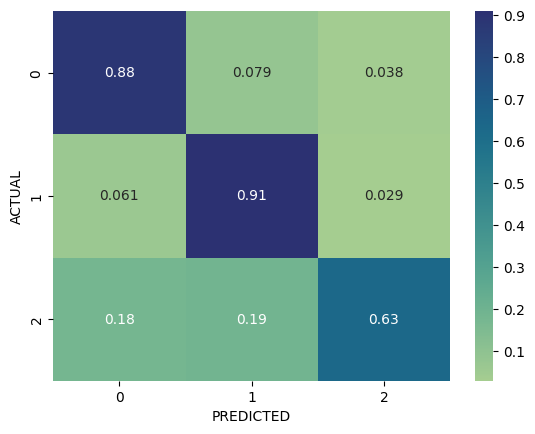

In [121]:
cf=confusion_matrix(y_test,pred,normalize='true')
sns.heatmap(cf,annot=True,cmap='crest')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')